# Food Sales Application

# Table of contents

1. [Project Description](#ProjectDescription)
2. [Step 1. Open the data file and study the general information.](#OpenData&GeneralInfo)
3. [Step 2. Prepare the data for analysis](#PrepareData)
4. [Step 3. Study and check the data](#StudyCheck)
6. [Step 4. Study the event funnel](#EventFunnel)
7. [Step 5. ](#)
8. [General Conclusion](#Conclusion)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | You work at a startup that sells food products. You need to investigate user behavior for the company's app.                                            | 
|  **What we have**        | Then look at the results of an A/A/B test. (Read on for more information about A/A/B testing.) The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.                    |
|  **Main question of project**  |  Will changes by application-wide font designers affect user behavior?                                                                            |
| **Project Description**  | [Link to Project Description](https://practicum.yandex.com/learn/data-analyst/courses/aaa92c32-5b7b-4eec-8a13-d1e099ee0be2/sprints/5646/topics/f9207047-1e54-4a62-ba08-0390dda7e4d5/lessons/6d5ba27b-3801-455b-94c7-96dca20f7495/)                                                                                                                                               |
| **Datasets**             | [/datasets/logs_exp_us.csv](https://code.s3.yandex.net/datasets/logs_exp_us.csv)                                                                       |

### Step 1. Open the data file and study the general information. <a name="OpenData&GeneralInfo"></a>

In [67]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
from plotly import graph_objects as go
import math

pd.set_option('max_colwidth', 400)

sns.set()

In [2]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
print('Anaconda version package:', sys.version)
print('Plotly version package:', plotly.__version__)

Pandas version library: 0.25.1
Numpy version library: 1.18.5
Seaborn version library: 0.9.0
Anaconda version package: 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Plotly version package: 4.1.1


In [3]:
df_data = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp_us.csv', sep="\t")

In [4]:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

In [5]:
def get_percent_of_na_table(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

In [6]:
# function to display helpfull information about each file.
def get_info(df):
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

In [7]:
get_info(df_data)

Head:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


,EventName
count,244126
unique,5
top,MainScreenAppear
freq,119205


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
EventName,0,0.0
DeviceIDHash,0,0.0
EventTimestamp,0,0.0
ExpId,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(244126, 4)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 413 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


> * In dataset no missing values, but exist 413 duplicated rows.

#### Step 2. Prepare the data for analysis <a name="PrepareData"></a>

> * Since the number of lines in which there is duplicate data is a small amount (413 rows) of the total number of lines (244126 rows), I decide to delete these duplicated lines.

In [8]:
df_data.drop_duplicates(inplace=True)

In [9]:
get_info(df_data)

Head:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
EventName         243713 non-null object
DeviceIDHash      243713 non-null int64
EventTimestamp    243713 non-null int64
ExpId             243713 non-null int64
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,DeviceIDHash,EventTimestamp,ExpId
count,2.437130e+05,2.437130e+05,243713.000000
mean,4.627963e+18,1.564914e+09,247.022161
std,2.642723e+18,1.771388e+05,0.824420
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


,EventName
count,243713
unique,5
top,MainScreenAppear
freq,119101


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
EventName,0,0.0
DeviceIDHash,0,0.0
EventTimestamp,0,0.0
ExpId,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(243713, 4)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [10]:
#converting timestamps
df_data['DateTime'] = df_data['EventTimestamp'].apply(lambda x: pd.datetime.fromtimestamp(x))
df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 06:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 13:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 13:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 13:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 13:48:42


In [11]:
df_data['Date'] = df_data['DateTime'].dt.date
df_data['Time'] = df_data['DateTime'].dt.time
df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 06:43:36,2019-07-25,06:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 13:11:42,2019-07-25,13:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 13:28:47,2019-07-25,13:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 13:28:47,2019-07-25,13:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 13:48:42,2019-07-25,13:48:42


#### Step 3. Study and check the data <a name="StudyCheck"></a>

- [X] How many events are in the logs?

In [12]:
n_events = df_data.groupby('EventName').agg({'EventName':'nunique'}).sum().reset_index()
n_events.columns = ['EventName', 'nEvents']
display(n_events)

,EventName,nEvents
0,EventName,5


In [13]:
df_data['EventName'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: EventName, dtype: int64

- [X] How many users are in the logs?

In [14]:
n_users = df_data.groupby(['DeviceIDHash']).agg({'DeviceIDHash':'nunique'}).sum().reset_index()
n_users.columns = ['DeviceId', 'nUsers']
display(n_users)

,DeviceId,nUsers
0,DeviceIDHash,7551


- What's the average number of events per user?


In [15]:
totalNumberEvents = df_data['EventName'].value_counts().sum()
display(totalNumberEvents)

243713

In [16]:
AveNumPerUser = (totalNumberEvents / n_users['nUsers']).round()
print('Average number of events per user:', AveNumPerUser)

Average number of events per user: 0    32.0
Name: nUsers, dtype: float64


- [X] What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?

In [17]:
df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 06:43:36,2019-07-25,06:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 13:11:42,2019-07-25,13:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 13:28:47,2019-07-25,13:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 13:28:47,2019-07-25,13:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 13:48:42,2019-07-25,13:48:42


In [18]:
DateMax = df_data['Date'].max()
print('Maximum date:', DateMax)

Maximum date: 2019-08-07


In [19]:
DateMin = df_data['Date'].min()
print('Minimum date:', DateMin)

Minimum date: 2019-07-25


In [20]:
def draw_hist(df, x, y, title, ylabel, xlabel):
    sns.set(style='dark')
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,5))
    ax = sns.barplot(x=x, y=y, data=df)
    plt.locs, labels = plt.xticks()
    #plt.yticks(np.arange(160, 640, step=20))
    #plt.setp(labels, rotation=rotation)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()    

C:\Users\Kanafin\Anaconda3\envs\pandas\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



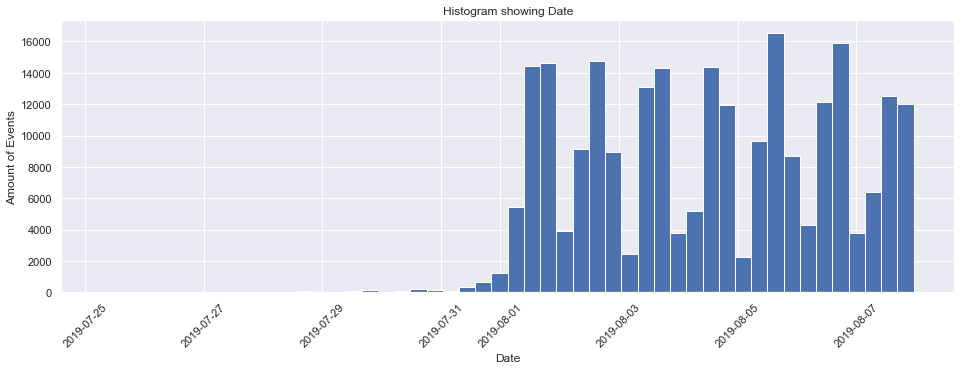

In [21]:
plt.figure(figsize=(16,5))
plt.locs, labels = plt.xticks()
#plt.yticks(np.arange(160, 640, step=20))
plt.setp(labels, rotation=45)
df_data['DateTime'].hist(bins=50)
plt.title('Histogram showing Date')
plt.ylabel('Amount of Events')
plt.xlabel('Date')
plt.show() 

- [X] Did you lose many events and users when excluding the older data? Make sure you have users from all three experimental groups.

In [22]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
new_df_data = df_data.loc[df_data['Date'] > '2019-07-31']

In [23]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2415,MainScreenAppear,3957232200565023322,1564610412,246,2019-08-01 00:00:12,2019-08-01,00:00:12
2416,OffersScreenAppear,3957232200565023322,1564610417,246,2019-08-01 00:00:17,2019-08-01,00:00:17
2417,MainScreenAppear,4933689529142781210,1564610429,246,2019-08-01 00:00:29,2019-08-01,00:00:29
2418,MainScreenAppear,1802682376349807053,1564610433,248,2019-08-01 00:00:33,2019-08-01,00:00:33
2419,MainScreenAppear,2011152258955517776,1564610442,247,2019-08-01 00:00:42,2019-08-01,00:00:42


In [24]:
print('New data slice:', new_df_data.shape[0])
print('Prev. data slice:', df_data.shape[0])
print('Lost {:} observations'.format(df_data.shape[0] - new_df_data.shape[0]))

New data slice: 241300
Prev. data slice: 243713
Lost 2413 observations


In [25]:
groups = new_df_data.groupby('ExpId').size().reset_index(name='Counts')
display(groups)

,ExpId,Counts
0,246,79440
1,247,77136
2,248,84724


#### Step 4. Study the event funnel <a name="EventFunnel"></a>

- [X] See what events are in the logs and their frequency of occurrence. Sort them by frequency.

In [26]:
eventsNames = new_df_data.groupby('EventName').agg({'DeviceIDHash':'count'}).sort_values(by='DeviceIDHash', ascending=False).reset_index()
eventsNames.head()

,EventName,DeviceIDHash
0,MainScreenAppear,117617
1,OffersScreenAppear,46420
2,CartScreenAppear,42322
3,PaymentScreenSuccessful,33935
4,Tutorial,1006


- [X] Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.

In [27]:
usersActions = new_df_data.groupby('EventName').agg({'DeviceIDHash':'nunique'}).sort_values(by='DeviceIDHash', ascending=False).reset_index()
usersActions.head()

,EventName,DeviceIDHash
0,MainScreenAppear,7423
1,OffersScreenAppear,4595
2,CartScreenAppear,3735
3,PaymentScreenSuccessful,3539
4,Tutorial,841


- [X] In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.

> - I think that the sequence of user actions is as follows:
> 1. Opening the main screen.
> 2. Suggestion screen.
> 3. Adding purchases to the cart - cart screen.
> 4. Successful payment.
> 5. The least popular, judging by the data, is the tutorial screen. It can be omitted from the funnel.

- [X] Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)

In [29]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2415,MainScreenAppear,3957232200565023322,1564610412,246,2019-08-01 00:00:12,2019-08-01,00:00:12
2416,OffersScreenAppear,3957232200565023322,1564610417,246,2019-08-01 00:00:17,2019-08-01,00:00:17
2417,MainScreenAppear,4933689529142781210,1564610429,246,2019-08-01 00:00:29,2019-08-01,00:00:29
2418,MainScreenAppear,1802682376349807053,1564610433,248,2019-08-01 00:00:33,2019-08-01,00:00:33
2419,MainScreenAppear,2011152258955517776,1564610442,247,2019-08-01 00:00:42,2019-08-01,00:00:42


In [30]:
usersVsAction = new_df_data.pivot_table(
    index='DeviceIDHash', 
    columns='EventName', 
    values='DateTime',
    aggfunc='min')

display(usersVsAction.head())

EventName,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
DeviceIDHash,,,,,
6888746892508752,NaT,2019-08-06 16:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 20:52:58,2019-08-06 20:52:54,2019-08-06 20:53:04,2019-08-06 20:52:58,NaT
6922444491712477,2019-08-04 16:19:40,2019-08-04 16:19:33,2019-08-04 16:19:46,2019-08-04 16:19:40,NaT
7435777799948366,NaT,2019-08-05 10:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 16:28:45,2019-08-01 06:29:54,2019-08-01 06:29:56,2019-08-02 16:28:45,NaT


Each table row presents a user. The columns contain the time each of the events first occurred. If the event didn't take place, its cell value is NaT.

In [31]:
# The number of users reaching Stage 1 (accessed the main screen)
NumberMainScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna()].shape[0]
print('The number of users reached Stage# 1: accessed the Main Screen:', NumberMainScreen)

The number of users reached Stage# 1: accessed the Main Screen: 7423


In [32]:
# The number of users reaching Stage 2 (accessed the main screen & offers screen)
NumberOfferScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                    (usersVsAction['OffersScreenAppear'] > usersVsAction['MainScreenAppear'])].shape[0]
print('The number of users reached Stage# 2: accessed the Main Screen and Offers Screen:', NumberOfferScreen)

The number of users reached Stage# 2: accessed the Main Screen and Offers Screen: 4206


In [33]:
# The number of users reaching Stage 3 (accessed the main screen & offers screen & payment screen)
NumberCartScreen =   usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                                      ~usersVsAction['OffersScreenAppear'].isna() & 
                                      (usersVsAction['CartScreenAppear'] > usersVsAction['OffersScreenAppear'])].shape[0]
print('The number of users reached Stage# 3: accessed the Main Screen, Offers Screen and Cart Screen:', NumberCartScreen)

The number of users reached Stage# 3: accessed the Main Screen, Offers Screen and Cart Screen: 1972


In [34]:
# The number of users reaching Stage 4 (accessed the main screen & offers screen & payment screen & tutorial)
NumberPaymentScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                                 ~usersVsAction['OffersScreenAppear'].isna() & 
                                 ~usersVsAction['CartScreenAppear'].isna() &
                                (usersVsAction['PaymentScreenSuccessful'] > usersVsAction['CartScreenAppear'])].shape[0]
print('The number of users reached Stage# 4: accessed the Main Screen, Offers Screen, Cart Screen and Payment Screen:', NumberPaymentScreen)

The number of users reached Stage# 4: accessed the Main Screen, Offers Screen, Cart Screen and Payment Screen: 934


In [35]:
# The number of users reaching Stage 4 (accessed the main screen & offers screen & payment screen & tutorial)
TutorialScreen = usersVsAction[~usersVsAction['MainScreenAppear'].isna() & 
                               ~usersVsAction['OffersScreenAppear'].isna() & 
                               ~usersVsAction['CartScreenAppear'].isna() &
                               ~usersVsAction['PaymentScreenSuccessful'].isna() &
                              (usersVsAction['Tutorial'] > usersVsAction['PaymentScreenSuccessful'])].shape[0]
print('The number of users reached Stage# 5: accessed the Main Screen, Offers Screen, Cart Screen, Payment Screen and Tutorial:', TutorialScreen)

The number of users reached Stage# 5: accessed the Main Screen, Offers Screen, Cart Screen, Payment Screen and Tutorial: 7


In [36]:
Stage2_stage1 = NumberOfferScreen / NumberMainScreen
Stage3_stage2 = NumberCartScreen / NumberOfferScreen
Stage4_stage3 = NumberPaymentScreen / NumberCartScreen
Stage5_stage4 = TutorialScreen / NumberPaymentScreen
Stage5_stage1 = NumberPaymentScreen / NumberMainScreen

print('Ratio Stage 2 to Stage 1: {:.2f}'.format(Stage2_stage1))
print('Ratio Stage 3 to Stage 2: {:.2f}'.format(Stage3_stage2))
print('Ratio Stage 4 to Stage 3: {:.2f}'.format(Stage4_stage3))
print('Ratio Stage 5 to Stage 4: {:.2f}'.format(Stage5_stage4))
print('Ratio Stage Payment Screen to Main Screen: {:.2%}'.format(Stage5_stage1))

Ratio Stage 2 to Stage 1: 0.57
Ratio Stage 3 to Stage 2: 0.47
Ratio Stage 4 to Stage 3: 0.47
Ratio Stage 5 to Stage 4: 0.01
Ratio Stage Payment Screen to Main Screen: 12.58%


In [46]:
usersActions.head()

,EventName,DeviceIDHash
0,MainScreenAppear,7423
1,OffersScreenAppear,4595
2,CartScreenAppear,3735
3,PaymentScreenSuccessful,3539
4,Tutorial,841


In [47]:
fig = go.Figure(go.Funnel(
    y = ["Main Screen", "Offers Screen", "Cart Screen", "Payment Screen"],
    x = [7423, 4595, 3735, 3539, 841]))

fig.show()

- [X] At what stage do you lose the most users?

> * At the first stage, when users have to go from the main screen to the offer screen: 0.57

- [X] What share of users make the entire journey from their first event to payment?

> * 12.5% of users go all the way from the first event to payment.

You can also use a visualization methos as a solution for the last two problems. A funnel chart would look great: https://plotly.com/python/funnel-charts/

#### Step 5. Study the results of the experiment <a name="Experiment"></a>

- [X] How many users are there in each group?

In [37]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2415,MainScreenAppear,3957232200565023322,1564610412,246,2019-08-01 00:00:12,2019-08-01,00:00:12
2416,OffersScreenAppear,3957232200565023322,1564610417,246,2019-08-01 00:00:17,2019-08-01,00:00:17
2417,MainScreenAppear,4933689529142781210,1564610429,246,2019-08-01 00:00:29,2019-08-01,00:00:29
2418,MainScreenAppear,1802682376349807053,1564610433,248,2019-08-01 00:00:33,2019-08-01,00:00:33
2419,MainScreenAppear,2011152258955517776,1564610442,247,2019-08-01 00:00:42,2019-08-01,00:00:42


In [38]:
usersPerGroup = new_df_data.groupby(['ExpId']).agg({'DeviceIDHash':'nunique'}).reset_index()
display(usersPerGroup)

,ExpId,DeviceIDHash
0,246,2484
1,247,2517
2,248,2537


- [X] We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.

Let us formulate hypotheses: 
 - H_0: (the null hypothesis): There is no statistically significant difference for group 246 and 247.
 - H_a: (the alternative hypothesis): There is statistically significant difference for group 246 and 247.

In [49]:
new_df_data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,DateTime,Date,Time
2415,MainScreenAppear,3957232200565023322,1564610412,246,2019-08-01 00:00:12,2019-08-01,00:00:12
2416,OffersScreenAppear,3957232200565023322,1564610417,246,2019-08-01 00:00:17,2019-08-01,00:00:17
2417,MainScreenAppear,4933689529142781210,1564610429,246,2019-08-01 00:00:29,2019-08-01,00:00:29
2418,MainScreenAppear,1802682376349807053,1564610433,248,2019-08-01 00:00:33,2019-08-01,00:00:33
2419,MainScreenAppear,2011152258955517776,1564610442,247,2019-08-01 00:00:42,2019-08-01,00:00:42


In [60]:
ExpIdGroups = new_df_data.pivot_table(index='EventName', values='DeviceIDHash', columns='ExpId', aggfunc=lambda x: x.nunique()).reset_index()
display(ExpIdGroups)
group_246 = ExpIdGroups[246]
group_247 = ExpIdGroups[247]

ExpId,EventName,246,247,248
0,CartScreenAppear,1266,1239,1230
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1522,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,280


In [61]:
def test_hyp(sample_1, sample_2):
    alpha = 0.05
    results = st.ttest_ind(sample_1, sample_2)
    print('p-value: ', results.pvalue)

    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis") 

In [62]:
test_hyp(group_246, group_247)

p-value:  0.9828429689264303
We can't reject the null hypothesis


- [X] Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?

In [64]:
# Figure the most popular event
popularEvents = new_df_data['EventName'].value_counts()
display(popularEvents.head())

MainScreenAppear           117617
OffersScreenAppear          46420
CartScreenAppear            42322
PaymentScreenSuccessful     33935
Tutorial                     1006
Name: EventName, dtype: int64

> * The most popular event is the opening of the home screen by users. And the most unpopular is the opening of the tutorial screen. 

In [65]:
display(ExpIdGroups)

ExpId,EventName,246,247,248
0,CartScreenAppear,1266,1239,1230
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1522,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,280


In [74]:
def check_hypothesis(Group1, Group2, eventName): 

    # define alpha value
    alpha = 0.05

    # define successes 
    successes_1 = ExpIdGroups[ExpIdGroups.EventName == eventName][Group1].iloc[0]
    successes_2 = ExpIdGroups[ExpIdGroups.EventName == eventName][Group2].iloc[0]

    # define trials
    trialsGroup_1 = new_df_data[new_df_data.ExpId == Group1]['DeviceIDHash'].nunique()
    trialsGroup_2 = new_df_data[new_df_data.ExpId == Group2]['DeviceIDHash'].nunique()    

    # proportion for success in group 1
    p1 = successes_1 / trialsGroup_1

    # proportion for success in group 2
    p2 = successes_2 / trialsGroup_2

    # proportion in a combined dataset
    p_combined = (successes_1 + successes_2) / (trialsGroup_1 + trialsGroup_2)

    # define difference and z value
    difference = p1 - p2
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trialsGroup_1 + 1/trialsGroup_2))

    # calculate distribution
    distr = st.norm(0,1)

    # calculate p_value
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p_value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")
    else:
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different") 

In [80]:
check_hypothesis(246, 247, 'MainScreenAppear')
check_hypothesis(246, 247, 'OffersScreenAppear')
check_hypothesis(246, 247, 'CartScreenAppear')
check_hypothesis(246, 247, 'PaymentScreenSuccessful')

p_value:  0.6756217702005545
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.24301271796804658
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.2182812140633792
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.10298394982948822
Failed to reject the null hypothesis: there is no reason to consider the proportions different


> * 0.675 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for MainScreenAppear between the groups.
> * 0.243 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for OffersScreenAppear between the groups.
> * 0.218 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for CartScreenAppear between the groups.
> * 0.102 > 0.05 -> we can't reject the null hypothesis; there's not a statistically significant difference for PaymentScreenSuccessful between the groups.

- [X] Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?

In [82]:
check_hypothesis(246, 248, 'MainScreenAppear')
check_hypothesis(246, 248, 'OffersScreenAppear')
check_hypothesis(246, 248, 'CartScreenAppear')
check_hypothesis(246, 248, 'PaymentScreenSuccessful')

p_value:  0.34705881021236484
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.20836205402738917
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.07842923237520116
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.2122553275697796
Failed to reject the null hypothesis: there is no reason to consider the proportions different


In [83]:
check_hypothesis(247, 248, 'MainScreenAppear')
check_hypothesis(247, 248, 'OffersScreenAppear')
check_hypothesis(247, 248, 'CartScreenAppear')
check_hypothesis(247, 248, 'PaymentScreenSuccessful')

p_value:  0.6001661582453706
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.9293730042460788
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.5973544899382834
Failed to reject the null hypothesis: there is no reason to consider the proportions different
p_value:  0.6982134522789267
Failed to reject the null hypothesis: there is no reason to consider the proportions different


- [X] What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

> * I have set a certain significance level equal 0.05. 

### General Conclusion: <a name="Conclusion"></a>

   Based on the previous data, the following conclusions can be drawn.
> * There is no significant difference between the indicators for group A - 246 and group A - 247 (the A/A Test)
> * A / B testing for 2 groups A (246 and 247) with group B (248) did not reveal significant differences. This means that "Changing fonts for the entire application," will not entail significant changes in the fact that a large number of users will reach the last stage - the payment screen.